#### <img src="./../res/logo_UTN.svg" align="right" width="150" /> 

#### Procesamiento Digital de Señales 

# Tarea Semanal Nº 7
#### Alumno: Mauro Fernández

# 1. Consigna

En esta tarea continuaremos con el capítulo 14 de Holton. **DSP Principles and App**.

Para ello, realizaremos el punto **3.a** del **TP2**.

<div class="alert alert-block alert-info">
    <b>3)</b> Genere la siguiente señal
</div> 

$$x(k) = a_0·\mathop{sen}(\Omega_1·k)$$

siendo

$$a_0 = 2$$

$$\Omega_1 = \Omega_0 + f_r·\frac{2\pi}{N}$$

$$\Omega_0 = \frac{\pi}{2}$$

y la variable aleatoria definida por la siguiente distribución de probabilidad

$$f_r \sim U(-2, \, 2)$$

Considere 200 realizaciones (muestras tomadas de $f_r$) para cada ventana analizada en la **TS6**. Se pide entonces:

<div class="alert alert-block alert-info">
    <b>3.a)</b> Grafique los histogramas de
</div> 

$$\lvert X^i_w(\Omega_0) \rvert$$

siendo

$$\lvert X^i_w(\Omega) \rvert = \lvert \mathcal{F}\{ x(k) · w_i(k) \} \rvert$$

para la i-ésima ventana de las 5 utilizadas en la **TS6**. El sesgo y la varianza se definen para este caso como:

<div class="alert alert-block alert-danger">
    Grafique los 5 histogramas juntos, o cuide que todos los gráficos tengan <b>el mismo rango de valores en X</b> para facilitar la comparación visual.
</div> 

<div class="alert alert-block alert-info">
    <b>3.b)</b> Calcule experimentalmente el sesgo y la varianza del siguiente estimador:
</div>

$$\hat{a_0} = \lvert X^i_w(\Omega_0) \rvert$$

siendo

$$s_a = \mathop{E}\{ \hat{a_0}\} - a_0$$

<br>

$$v_a = \mathop{var} \{ \hat{a_0} \} = \mathop{E}\{ ( \hat{a_0} - \mathop{E} \{ \hat{a_0} \} )^2 \}$$

<br>

y pueden aproximarse cuando consideramos los valores esperados como las medias muestrales

<br>

$$\mathop{E}\{ \hat{a_0}\} = \hat{\mu_a} = \frac{1}{M} \sum^{M-1}_{j=0} \hat{a_{j}}$$

<br>

$$s_a = \hat{\mu_a} - a_0$$

<br>

$$v_a = \frac{1}{M} \sum^{M-1}_{j=0} (\hat{a_{j}} - \hat{\mu_a})^2$$

<br>

<img src="./tabla.png" align="center" width="511" />

**Bonus**: Visualizar los 5 histogramas juntos


# 2. Resolución
## 2.1 Generación de la señal, aplicación de ventana y graficación de histogramas

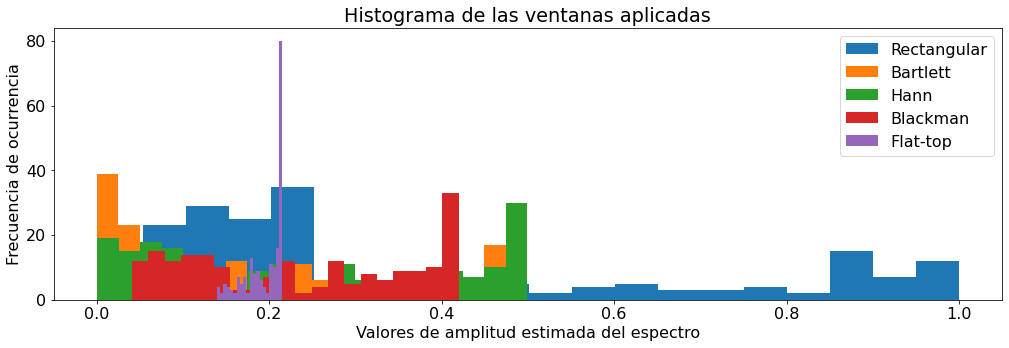

In [20]:
# Importamos bibliotecas a utilizar
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from pandas import DataFrame
from IPython.display import HTML
from pds import window_rectangular, window_bartlett, window_hann, window_blackman, window_flat_top

# Configuramos tamaño de gráficos
mpl.rcParams['figure.figsize'] = (17,5)

# Configuramos tamaño de fuentes de gráficos
plt.rcParams.update({'font.size': 16})

# Definimos parámetros de la señal senoidal a generar
N  = 1000 # Cantidad de muestras
fs = 1000 # Frecuencia de muestreo
a0 = 2    # Amplitud de la señal

# Calculamos el tiempo de muestreo
ts = 1/fs

# Generamos la base de tiempos
tt = np.linspace(0, (N-1)*ts, num=N).reshape(N,1)

# Definimos cantidad de realizaciones
R = 200

# Obtenemos las realizaciones de la variable aleatoria
fr = np.random.uniform(-2,2,R)

# Calculamos la frecuencia angular de la señal
Ω0 = np.pi / 2
Ω1 = Ω0 + fr * ((2*np.pi)/N)

# Definimos parámetro normalizador
norm = (fs / (2*np.pi))

# Desnormalizamos la frecuencia angular
Ω1 *= norm

# Transformamos las dimensiones del array para poder multiplicar por tt
Ω1 = Ω1.reshape(1,R)

# Generamos la amplitud de la señal para cada instante en la base de tiempos
xx = a0 * np.sin(2*np.pi * Ω1 * tt)

# Generamos las ventanas a aplicar a la señal
ww_rectangular = window_rectangular(N)
ww_bartlett    = window_bartlett(N)
ww_hann        = window_hann(N)
ww_blackman    = window_blackman(N)
ww_flat_top    = window_flat_top(N)

# Transformamos las dimensiones del array para poder multiplicar por la señal
ww_rectangular = ww_rectangular.reshape(N,1)
ww_bartlett    = ww_bartlett.reshape(N,1)
ww_hann        = ww_hann.reshape(N,1)
ww_blackman    = ww_blackman.reshape(N,1)
ww_flat_top    = ww_flat_top.reshape(N,1)

# Aplicamos las ventanas a la señal
xx_rectangular = xx * ww_rectangular
xx_bartlett    = xx * ww_bartlett
xx_hann        = xx * ww_hann
xx_blackman    = xx * ww_blackman
xx_flat_top    = xx * ww_flat_top

# Calculamos resolución espectral
df = ((2*np.pi)/N) * norm

# Generamos la base de frecuencias
#ff = np.linspace(0, (N-1)*df, num=N)
ff = np.fft.fftfreq(N,d=1/fs)

# Calculamos la fft de cada señal a la cual aplique una ventana
fftx_rectangular = np.fft.fft(xx_rectangular, axis=0) * (1/N) 
fftx_bartlett    = np.fft.fft(xx_bartlett,    axis=0) * (1/N) 
fftx_hann        = np.fft.fft(xx_hann,        axis=0) * (1/N) 
fftx_blackman    = np.fft.fft(xx_blackman,    axis=0) * (1/N) 
fftx_flat_top    = np.fft.fft(xx_flat_top,    axis=0) * (1/N) 

# Definimos la frecuencia desnormalizada asociada a mi estimador
f0 = Ω0 * norm

# Calculamos el valor de mi estimador para cada fft
a0_hat_rectangular = np.abs(fftx_rectangular[ff == f0, :])
a0_hat_bartlett    = np.abs(fftx_bartlett   [ff == f0, :])
a0_hat_hann        = np.abs(fftx_hann       [ff == f0, :])
a0_hat_blackman    = np.abs(fftx_blackman   [ff == f0, :])
a0_hat_flat_top    = np.abs(fftx_flat_top   [ff == f0, :])

# Graficamos histogramas
plt.figure()
plt.hist(a0_hat_rectangular.flatten(),label="Rectangular",bins=20)
plt.hist(a0_hat_bartlett.flatten(),label="Bartlett",bins=20)
plt.hist(a0_hat_hann.flatten(),label="Hann",bins=20)
plt.hist(a0_hat_blackman.flatten(),label="Blackman",bins=20)
plt.hist(a0_hat_flat_top.flatten(),label="Flat-top",bins=20)
plt.title("Histograma de las ventanas aplicadas")
plt.ylabel("Frecuencia de ocurrencia")
plt.xlabel("Valores de amplitud estimada del espectro")
plt.legend()
plt.show()

## 2.2 Cálculo de sesgo y varianza del estimador

In [21]:
# Calculamos valor esperado, aproximado como la media muestral
mean_a0_hat_rectangular = np.mean(a0_hat_rectangular)
mean_a0_hat_bartlett    = np.mean(a0_hat_bartlett   )
mean_a0_hat_hann        = np.mean(a0_hat_hann       )
mean_a0_hat_blackman    = np.mean(a0_hat_blackman   )
mean_a0_hat_flat_top    = np.mean(a0_hat_flat_top   )

# Calculamos el sesgo
sa_rectangular = mean_a0_hat_rectangular - a0
sa_bartlett    = mean_a0_hat_bartlett    - a0
sa_hann        = mean_a0_hat_hann        - a0
sa_blackman    = mean_a0_hat_blackman    - a0
sa_flat_top    = mean_a0_hat_flat_top    - a0

# Calculamos la varianza
va_rectangular = np.var(a0_hat_rectangular)
va_bartlett    = np.var(a0_hat_bartlett   )
va_hann        = np.var(a0_hat_hann       )
va_blackman    = np.var(a0_hat_blackman   )
va_flat_top    = np.var(a0_hat_flat_top   )

# Presentamos los resultados en una tabla
data = [
    [sa_rectangular, va_rectangular],
    [sa_bartlett   , va_bartlett   ],
    [sa_hann       , va_hann       ],
    [sa_blackman   , va_blackman   ],
    [sa_flat_top   , va_flat_top   ]
]

df = pd.DataFrame(data, columns=['$s_a$', '$v_a$'], index=[
    'Rectangular',
    'Bartlett',
    'Hann',
    'Blackman',
    'Flat-top'
])

HTML(df.to_html())

,$s_a$,$v_a$
Rectangular,-1.641030,0.099439
Bartlett,-1.785005,0.032626
Hann,-1.757265,0.030008
Blackman,-1.763117,0.016367
Flat-top,-1.804165,0.000489


# 3. Conclusiones

Vemos en el histograma y en la tabla que al aplicar ventanas a mi señal se va reduciendo la varianza de mi estimador de amplitud, siendo el menor valor el obtenido para la ventana Flat-Top. Si bien para esta ventana el sesgo es mucho mayor, esto puede ser corregido aplicando una constante o recta de calibración.
Para esta situación entonces aplicar la ventana Flat-Top fue muy efectiva para mejorar mi estimador.
Vemos también que la peor situación es en la ventana Rectangular, que es lo mismo que no aplicar una ventana, es donde tengo mayor dispersión de los valores.